<h1 style='color: blue; font-size: 34px; font-weight: bold;'> Planejamento de Experimentos 
</h1>


# <font color='red' style='font-size: 30px;'>1.0 Introdução   </font>
<hr style='border: 2px solid red;'>




<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i> “Chamar um especialista em estatística depois que o experimento foi feito pode ser o mesmo que pedir para ele fazer um exame post-mortem. Talvez ele consiga dizer do que foi que o experimento morreu.”  </i>     
</p>    

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: right; text-indent: 0px;'>    
    <b>Sir Ronald Fisher</b>  

<hr>






# <font color='red' style='font-size: 30px;'> Introdução à análise de experimentos   </font>
<hr style='border: 2px solid red;'>

# <font color = 'purple'> Inserindo o experimento num Data Frame </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

## Importando as bibliotecas 

### Pandas

https://pandas.pydata.org/

In [28]:
import pandas as pd
from watchdog import observers

### Numpy

http://www.numpy.org/

In [29]:
import numpy as np



<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
    <font color="red"> <b>Ensaios realizados na forma normalizada</b> 


<img width='800px' src='figuras/Figura_2.png'>

 
   
   
    


<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
<font color="MidnightBlue"> Construindo uma matriz representando todos os ensaios realizados:


In [30]:
ensaios = np.array([[-1,-1], [1,-1], [-1,1], [1,1]])

### pyDOE2

https://pypi.org/project/pyDOE2/

In [31]:
import pyDOE2 as doe

## Costruindo um planejamento fatorial de 2²


In [32]:
ensaios = doe.ff2n(2)

In [33]:
ensaios

array([[-1., -1.],
       [ 1., -1.],
       [-1.,  1.],
       [ 1.,  1.]])

## Incerindo o planejamento em um Data Frame

In [34]:
experimento = pd.DataFrame(ensaios, columns=["Farinha", "Chocolate"])

In [35]:
experimento

,Farinha,Chocolate
0,-1.0,-1.0
1,1.0,-1.0
2,-1.0,1.0
3,1.0,1.0


### Inserindo coluna com os resultados 

In [36]:
experimento["Porcoes"] = [19, 37, 24, 49]

In [37]:
experimento

,Farinha,Chocolate,Porcoes
0,-1.0,-1.0,19
1,1.0,-1.0,37
2,-1.0,1.0,24
3,1.0,1.0,49


<hr>
<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
    <font color="MidnightBlue"> <b>Conclusão:</b> Temos, por fim, nosso experimento representado por um <i>DataFrame</i> do Pandas. Usaremos este <i>DataFrame</i> para iniciarmos a análise do nosso experimento. 
    
<hr>   

# <font color = 'purple'> Analisando graficamente o experimento   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

###  Importando o Seaborn

https://seaborn.pydata.org

In [38]:
import seaborn as sns

In [39]:
# paletas -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
sns.set_palette("terrain")

# estilo -> white, dark, whitegrid, darkgrid, ticks
sns.set_style("darkgrid")

### Para a farinha

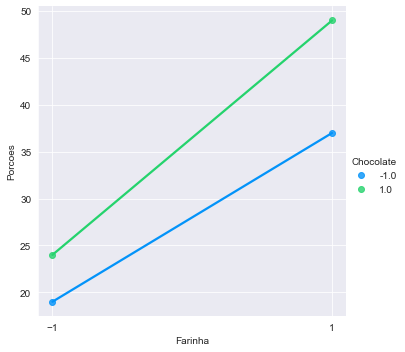

In [40]:
ax1 = sns.lmplot(data=experimento, x="Farinha", y="Porcoes", ci=None, hue="Chocolate")
ax1.set(xticks=(-1, 1))

### Para o chocolate

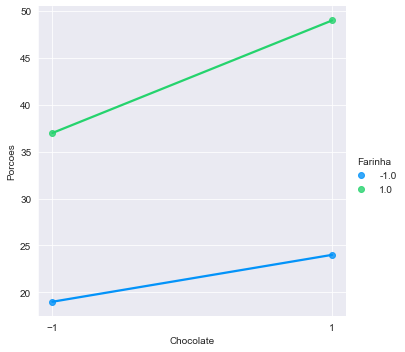

In [41]:
ax2 = sns.lmplot(data=experimento, x="Chocolate", y="Porcoes", ci=None, hue="Farinha")
ax2.set(xticks=(-1, 1))

# <font color = 'purple'> Ajustando o modelo estatístico </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

<hr>

<img width='800px' src='figuras/Figura_3.png'>

<p style='margin: 30px 30px;'> 

<hr>


### Bibliotecas  Stats Model


In [42]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

### .

In [43]:
modelo = smf.ols(data=experimento, formula="Porcoes ~ Farinha + Chocolate + Farinha:Chocolate")

In [44]:
modelo_ajustado = modelo.fit()

In [45]:
print(modelo_ajustado.summary())

                            OLS Regression Results                            
Dep. Variable:                Porcoes   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 15 Aug 2022   Prob (F-statistic):                nan
Time:                        20:58:31   Log-Likelihood:                    inf
No. Observations:                   4   AIC:                              -inf
Df Residuals:                       0   BIC:                              -inf
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            32.2500        na

C:\Users\paulo\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\paulo\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1749: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\paulo\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1749: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\paulo\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
C:\Users\paulo\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:50: RuntimeWarning: invalid value encountered in d

# <font color = 'purple'> Aumentando os Graus de liberdade  </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>



<p style='margin: 30px 30px;'>     
    


<hr>


<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
    <font color="red"> <b>Replicatas no centro</b>


<img width='800px' src='figuras/Figura_5.png'> 


<p style='margin: 30px 30px;'> 
    
    
 
    

    
<hr>    

In [46]:
centro = np.array([
    [0, 0, 29],
    [0, 0, 30],
    [0, 0, 29],
    [0, 0, 30]
])

In [47]:
centro_dataframe = pd.DataFrame(centro, columns=["Farinha", "Chocolate", "Porcoes"], index=[4, 5, 6, 7])

In [48]:
centro_dataframe

,Farinha,Chocolate,Porcoes
4,0,0,29
5,0,0,30
6,0,0,29
7,0,0,30


### .

In [49]:
experimento = pd.concat([experimento, centro_dataframe])

In [50]:
experimento

,Farinha,Chocolate,Porcoes
0,-1.0,-1.0,19
1,1.0,-1.0,37
2,-1.0,1.0,24
3,1.0,1.0,49
4,0.0,0.0,29
5,0.0,0.0,30
6,0.0,0.0,29
7,0.0,0.0,30


# <font color = 'purple'>  Análise de significância estatística   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

In [52]:
modelo = smf.ols(data=experimento, formula="Porcoes ~ Farinha + Chocolate + Farinha:Chocolate")

In [53]:
modelo_ajustado = modelo.fit()

In [54]:
print(modelo_ajustado.summary())

                            OLS Regression Results                            
Dep. Variable:                Porcoes   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     45.21
Date:                Mon, 15 Aug 2022   Prob (F-statistic):            0.00152
Time:                        21:09:49   Log-Likelihood:                -14.155
No. Observations:                   8   AIC:                             36.31
Df Residuals:                       4   BIC:                             36.63
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            30.8750      0.71

C:\Users\paulo\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<p style='margin: 200px 200px;'>    


<hr>


    
 <img width='400px' src='figuras/Figura_6.png'> 


<p style='margin: 30px 30px;'>    

<hr>


 <img width='600px' src='figuras/Figura_7.png'> 


<p style='margin: 30px 30px;'>        
    
    
 <hr>   
    

  
 <img width='600px' src='figuras/Figura_10.png'> 


<p style='margin: 30px 30px;'>       
  
<hr>        


# <font color = 'purple'> Teste de significância estatística usando o <b>t<b>    </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>





<hr>
<img width='600px' src='figuras/Figura_11.png'> 


<hr>
  <p style='margin: 30px 30px;'>     
<img width='900px' src='figuras/Figura_8.png'> 


<hr>



<p style='margin: 150px 150px;'>     
<img width='1000px' src='figuras/Figura_20.png'



<hr>
<p style='margin: 150px 150px;'>    

In [55]:
t_valores = modelo_ajustado.tvalues

In [56]:
t_valores

Intercept            43.494275
Farinha              10.708252
Chocolate             4.233495
Farinha:Chocolate     1.743204
dtype: float64

In [57]:
nome = t_valores.index.tolist()

In [58]:
nome

['Intercept', 'Farinha', 'Chocolate', 'Farinha:Chocolate']

### .

In [64]:
from scipy import stats

### .


In [65]:
distribuicao = stats.t(df=4)

In [66]:
distribuicao.ppf(q=1 - 0.025)

2.7764451051977987

In [67]:
limite = [distribuicao.ppf(q=1 - 0.025)] * len(nome)

In [68]:
limite

[2.7764451051977987,
 2.7764451051977987,
 2.7764451051977987,
 2.7764451051977987]

### Plotando o gráfico 

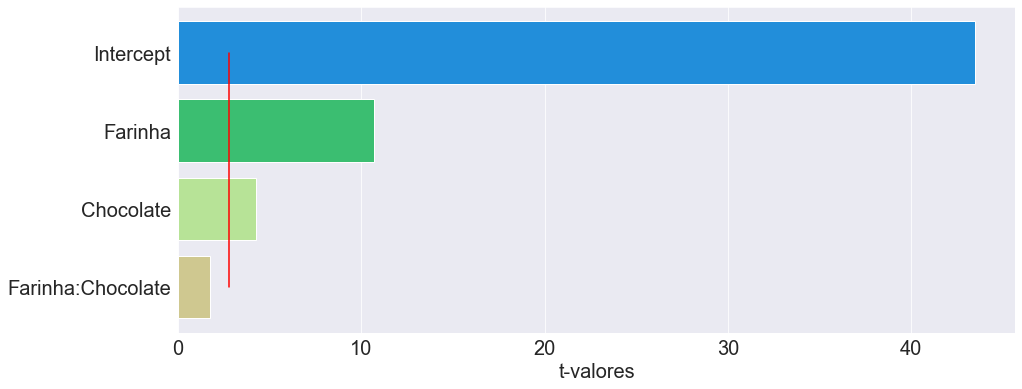

In [69]:
pareto = sns.barplot(x=t_valores, y=nome)
pareto.figure.set_size_inches(15, 6)
pareto.tick_params(labelsize=20)
pareto.set_xlabel("t-valores", fontsize=20)
pareto.plot(limite, nome, "r")

# <font color = 'purple'> Propondo um novo modelo   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>


<hr>

<img width='800px' src='figuras/Figura_3.png'>

<p style='margin: 30px 30px;'> 

<hr>

<p style='margin: 200px 200px;'>


<hr>

<img width='600px' src='figuras/Figura_9.png'> 

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>


<p style='margin: 30px 30px;'>

    
<hr>    


In [70]:
modelo_2 = smf.ols(data=experimento, formula="Porcoes ~ Farinha + Chocolate")

In [71]:
modelo_ajustado_2 = modelo_2.fit()

In [72]:
print(modelo_ajustado_2.summary())

                            OLS Regression Results                            
Dep. Variable:                Porcoes   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     47.09
Date:                Mon, 15 Aug 2022   Prob (F-statistic):           0.000571
Time:                        21:29:42   Log-Likelihood:                -16.416
No. Observations:                   8   AIC:                             38.83
Df Residuals:                       5   BIC:                             39.07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.8750      0.842     36.658      0.0

C:\Users\paulo\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<hr>

# <font color = 'purple'> Gráfico Padronizado de Pareto do novo modelo    </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>


In [73]:
t_valores = modelo_ajustado_2.tvalues

In [74]:
t_valores

Intercept    36.658022
Farinha       9.025173
Chocolate     3.568092
dtype: float64

In [76]:
nome = t_valores.index.tolist()

In [77]:
nome

['Intercept', 'Farinha', 'Chocolate']

### .

In [79]:
distribuicao = stats.t(df=5)

In [80]:
distribuicao.ppf(q=1 - 0.025)

2.5705818366147395

In [82]:
limite = [distribuicao.ppf(q=1 - 0.025)] * len(nome)
limite

[2.5705818366147395, 2.5705818366147395, 2.5705818366147395]

### Plotando o gráfico

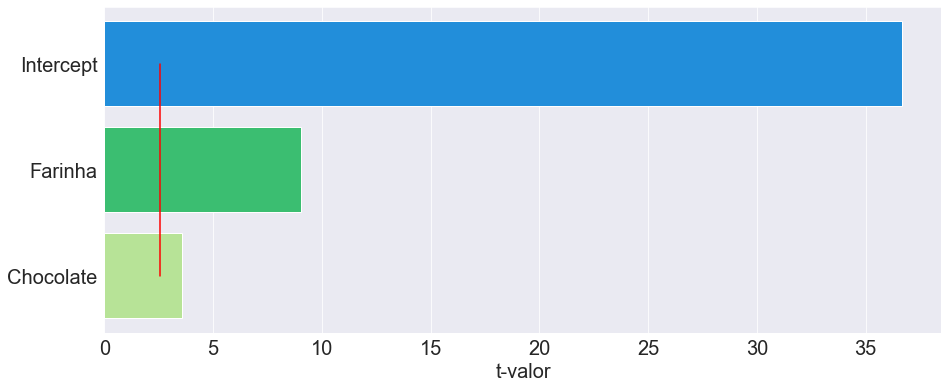

In [85]:
pareto = sns.barplot(x=t_valores, y=nome)
pareto.figure.set_size_inches(15, 6)
pareto.tick_params(labelsize=20)
pareto.set_xlabel("t-valor", fontsize=20)
pareto.plot(limite, nome, "r")

<font color='red' style='font-size: 30px;'> Preditos por observados  </font>
<hr style='border: 2px solid red;'>

In [86]:
observados = experimento.Porcoes

In [88]:
observados

0    19
1    37
2    24
3    49
4    29
5    30
6    29
7    30
Name: Porcoes, dtype: int64

### .

In [89]:
preditos = modelo_ajustado_2.predict()

In [90]:
preditos

array([15.875, 37.375, 24.375, 45.875, 30.875, 30.875, 30.875, 30.875])

### .

In [91]:
import matplotlib.pyplot as plt

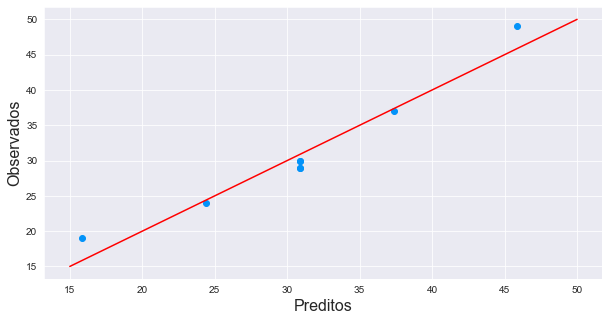

In [95]:
plt.figure(figsize=(10,5))
plt.xlabel("Preditos", fontsize=16)
plt.ylabel("Observados", fontsize=16)

#linha de guia
x = np.linspace(start=15, stop=50, num=10)
y = x

plt.plot(x, y, "r")

#comparação
plt.scatter(preditos, observados)

<hr>

In [96]:
print(modelo_ajustado_2.summary())

                            OLS Regression Results                            
Dep. Variable:                Porcoes   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     47.09
Date:                Tue, 16 Aug 2022   Prob (F-statistic):           0.000571
Time:                        12:31:05   Log-Likelihood:                -16.416
No. Observations:                   8   AIC:                             38.83
Df Residuals:                       5   BIC:                             39.07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.8750      0.842     36.658      0.0

C:\Users\paulo\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### .

# <font color = 'purple'> Explorando o modelo   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

In [97]:
parametros = modelo_ajustado_2.params

In [98]:
parametros

Intercept    30.875
Farinha      10.750
Chocolate     4.250
dtype: float64

### .

### Definindo a função

In [109]:
def modelo_receita(x_f, x_c):
    #limite
    limite_normalizado = [-1, 1]
    limite_farinha = [0.5, 1.5]
    limite_chocolate = [0.1, 0.5]

    #converter
    x_f_convertido = np.interp(x_f, limite_farinha, limite_normalizado)
    x_c_convertido = np.interp(x_c, limite_chocolate, limite_normalizado)

    porcoes = parametros.Intercept + parametros.Farinha * x_f_convertido + parametros["Chocolate"] * x_c_convertido

    return round(porcoes)

In [110]:
modelo_receita(0.5, 0.1)

16


<p style='margin: 150px 150px;'>


<hr>

<img width='700px' src='figuras/Figura_22.png'> 


<hr>

# <font color = 'purple'> Mapa de cores   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>


<p style='margin: 150px 150px;'>


<hr>

<img width='700px' src='figuras/Figura_23.jpg'> 

#### Fonte: National Centers for Environmental Prediction


<hr>



<p style='margin: 50px 50px;'>




<p style='margin: 150px 150px;'>


<hr>

<img width='600px' src='figuras/Figura_24.png'> 


<hr>



<p style='margin: 30px 30px;'>

In [111]:
x_farinha = np.linspace(start=0.5, stop=1.5, num=10)

In [112]:
x_farinha

array([0.5       , 0.61111111, 0.72222222, 0.83333333, 0.94444444,
       1.05555556, 1.16666667, 1.27777778, 1.38888889, 1.5       ])

### . 

In [113]:
x_chocolate = np.linspace(start=0.1, stop=0.5, num=10)

In [114]:
x_chocolate

array([0.1       , 0.14444444, 0.18888889, 0.23333333, 0.27777778,
       0.32222222, 0.36666667, 0.41111111, 0.45555556, 0.5       ])

### .

In [117]:
pontos = []

for cont1 in x_farinha:
    temp = []
    for cont2 in x_chocolate:
        temp.append(modelo_receita(cont1, cont2))

    pontos.append(temp)

In [118]:
pontos

[[16, 17, 18, 19, 20, 21, 22, 22, 23, 24],
 [18, 19, 20, 21, 22, 23, 24, 25, 26, 27],
 [21, 22, 23, 23, 24, 25, 26, 27, 28, 29],
 [23, 24, 25, 26, 27, 28, 29, 30, 31, 32],
 [25, 26, 27, 28, 29, 30, 31, 32, 33, 34],
 [28, 29, 30, 31, 32, 33, 33, 34, 35, 36],
 [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
 [33, 34, 34, 35, 36, 37, 38, 39, 40, 41],
 [35, 36, 37, 38, 39, 40, 41, 42, 43, 43],
 [37, 38, 39, 40, 41, 42, 43, 44, 45, 46]]

### .

### Construindo a superfície de resposta

In [122]:
import matplotlib.cm as cm

https://matplotlib.org/users/colormaps.html

C:\Users\paulo\AppData\Local\Temp\ipykernel_18080\1630450241.py:11: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar().set_label("Porções", fontsize=16)
C:\Users\paulo\AppData\Local\Temp\ipykernel_18080\1630450241.py:14: UserWarning: The following kwargs were not used by contour: 'linewidth'
  linhas = plt.contour(x_farinha, x_chocolate, pontos, colors="k", linewidth=1.5)


<a list of 7 text.Text objects>

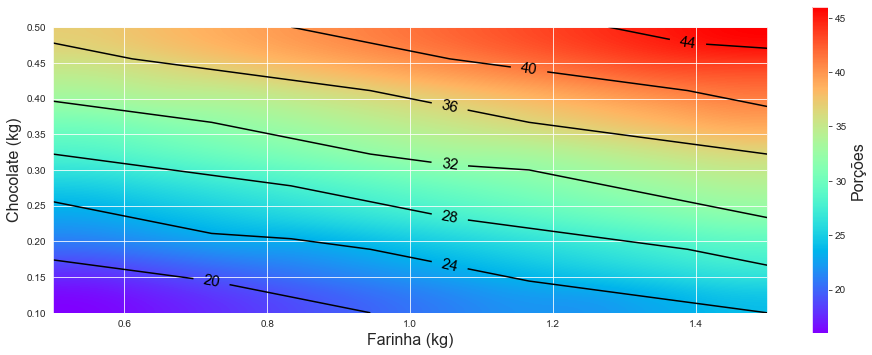

In [131]:
#base

plt.figure(figsize=(16,6))
plt.xlabel("Farinha (kg)", fontsize=16)
plt.ylabel("Chocolate (kg)", fontsize=16)

#mapa de cores
mapa_cor = plt.imshow(pontos, cmap=cm.rainbow, interpolation="quadric", extent=(0.5, 1.5, 0.1, 0.5), origin="lower") #interpolation: colorir pontos não informados

#barra de cor
plt.colorbar().set_label("Porções", fontsize=16)

#linhas
linhas = plt.contour(x_farinha, x_chocolate, pontos, colors="k", linewidth=1.5)
plt.clabel(linhas, inline=True, fmt="%1.0f", fontsize=15, inline_spacing=10)